In [2]:
%matplotlib inline
import os
import re
import cv2
import mmcv
import skimage
import json
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io

import matplotlib.pyplot as plt
import pylab
import plotly_express as px
import seaborn as sns
import json
from tqdm import tqdm
from numpy import random
from collections import defaultdict
%load_ext autoreload
%autoreload 2
# from utils.visual import draw_bbox

In [13]:
sub_json = '/data/yao/reid/PReID/rep_work_dirs/exp5-mgn-resnet50ibnls2-384x144-bs12x8-warmup10-flip-pad10-meanstd-lbsm-layer3_-5-erase0502-allgem_3-minInst2/eval/exp5-mgn-resnet50ibnls2-384x144-bs12x8-warmup10-flip-pad10-meanstd-lbsm-layer3_-5-erase0502-allgem_3-minInst2-flip_adabn_mgnsub.json'
with open(sub_json,'r') as fp:
    results = json.load(fp)
sub_json = '/data/yao/reid/PReID/rep_work_dirs/exp5-mgn-resnet50ibnls2-384x144-bs12x8-warmup10-flip-pad10-meanstd-lbsm-layer3_-5-erase0502-allgem_3-minInst2/eval/exp5-mgn-resnet50ibnls2-384x144-bs12x8-warmup10-flip-pad10-meanstd-lbsm-layer3_-5-erase0502-allgem_3-minInst2-flip_adabn_mgnsub_aqe.json'
with open(sub_json,'r') as fp:
    post_results = json.load(fp)

In [14]:
query_dir = '/data/Dataset/PReID/dataset2/query_a/'
gallery_dir = '/data/Dataset/PReID/dataset2/gallery_a/'

query: 744431180.png


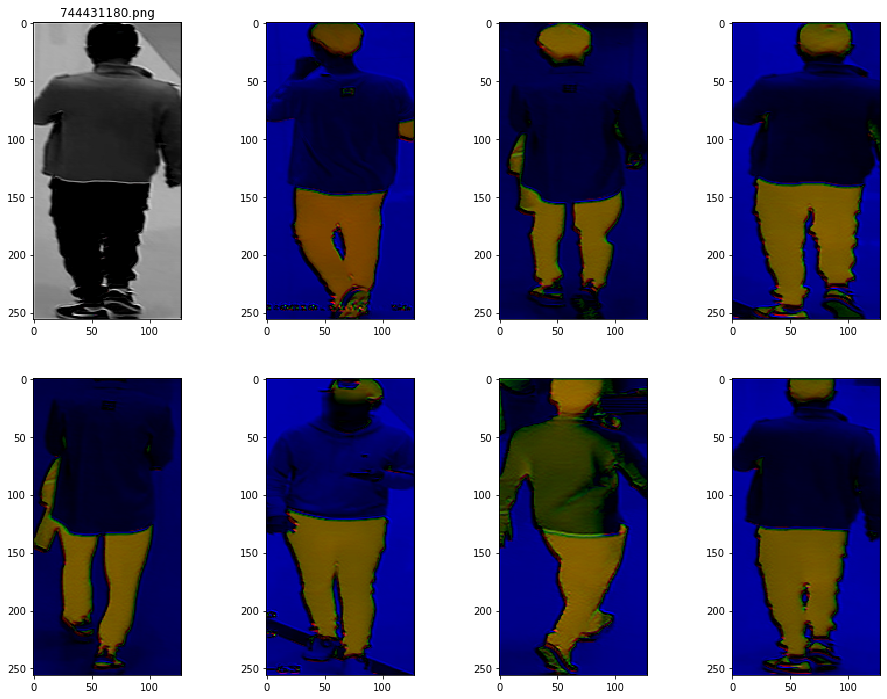

In [50]:
pylab.rcParams['figure.figsize'] = (16,12.0)

n_col = 4
queries = list(results.keys())
np.random.shuffle(queries)
query = queries[0]
print('query:',query)
retrievals = [gallery_dir+fname for fname in results[query]]
query = query_dir+query

plt.figure()

topk = 7
filenames = retrievals[:topk]
# print(filenames)
filenames = sorted(filenames)
plt.subplot((topk+1)//n_col+((topk+1)%n_col>0),n_col,1)
img = cv2.imread(query)
plt.title(query.split('/')[-1])
# print(filename.split('/')[-1])
img= cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

plt.imshow(img)
for idx,filename in enumerate(filenames):
    plt.subplot((topk+1)//n_col+((topk+1)%n_col>0),n_col,idx+2)
    img = cv2.imread(filename)
#     img= cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

    plt.imshow(img)

#     plt.title(filename.split('/')[-1])

query: 693521596.png


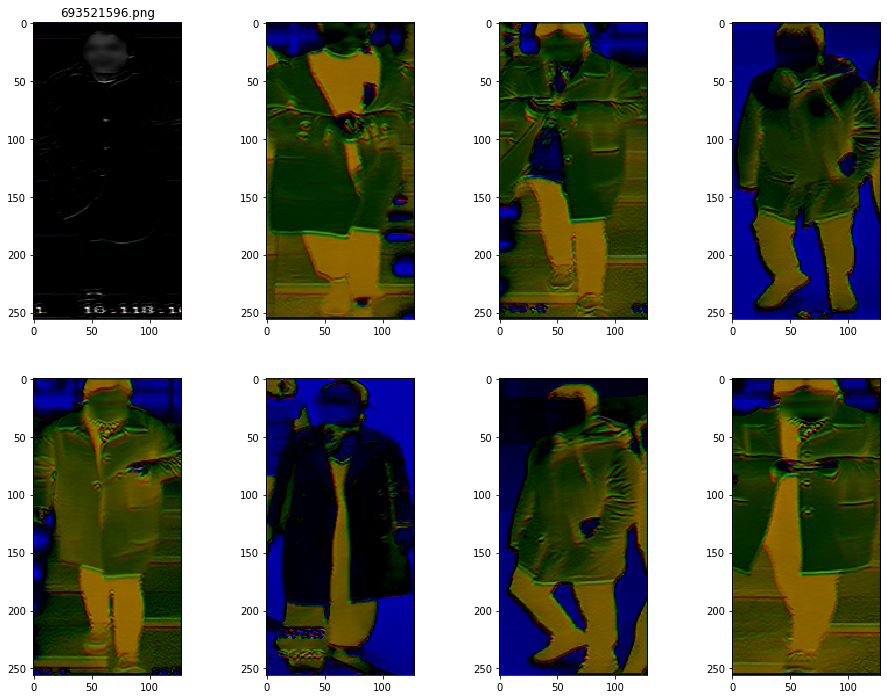

In [49]:
pylab.rcParams['figure.figsize'] = (16, 12.0)

n_col = 4
queries = list(results.keys())
np.random.shuffle(queries)
query = queries[0]
query = '693521596.png'
print('query:',query)
retrievals = [gallery_dir+fname for fname in post_results[query]]
query = query_dir+query

plt.figure()

topk = 7
filenames = retrievals[:topk]
# print(filenames)
filenames = sorted(filenames)
plt.subplot((topk+1)//n_col+((topk+1)%n_col>0),n_col,1)
img = cv2.imread(query)
plt.title(query.split('/')[-1])
# print(filename.split('/')[-1])
img= cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

plt.imshow(img)
for idx,filename in enumerate(filenames):
    plt.subplot((topk+1)//n_col+((topk+1)%n_col>0),n_col,idx+2)
    img = cv2.imread(filename)
#     img= cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

    plt.imshow(img)

#     plt.title(filename.split('/')[-1])